In [ ]:
!pip install openpyxl
! pip install graphviz

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns

# for models
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.inspection import permutation_importance
from xgboost import plot_importance
import shap

from sklearn.linear_model import LogisticRegression

# display all the columns and rows 
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', None)
# set figure size for single graphs 
plt.rcParams['figure.figsize'] = [15, 6]

C:\Users\sasha\anaconda3\lib\site-packages\llvmlite\llvmpy\__init__.py:3: UserWarning: The module `llvmlite.llvmpy` is deprecated and will be removed in the future.
  warnings.warn(
C:\Users\sasha\anaconda3\lib\site-packages\llvmlite\llvmpy\core.py:8: UserWarning: The module `llvmlite.llvmpy.core` is deprecated and will be removed in the future. Equivalent functionality is provided by `llvmlite.ir`.
  warnings.warn(
C:\Users\sasha\anaconda3\lib\site-packages\llvmlite\llvmpy\passes.py:17: UserWarning: The module `llvmlite.llvmpy.passes` is deprecated and will be removed in the future. If you are using this code, it should be inlined into your own project.
  warnings.warn(


In [7]:
raw_data = pd.read_csv('Loan_status_2007-2020Q3.gzip', nrows=7*10**5, low_memory=False)

In [8]:
df = raw_data.copy()
df.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
loan_amnt,5000.0,2500.0,2400.0,10000.0,3000.0
funded_amnt,5000.0,2500.0,2400.0,10000.0,3000.0
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5


In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(700000, 141)

In [10]:
des_label = pd.read_excel('LCDataDictionary.xlsx').dropna(axis=1, how='all', inplace=False)
des_label

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [11]:
df.dtypes.sort_values()

max_bal_bc                                    float64
mo_sin_old_rev_tl_op                          float64
mo_sin_old_il_acct                            float64
delinq_amnt                                   float64
chargeoff_within_12_mths                      float64
bc_util                                       float64
bc_open_to_buy                                float64
avg_cur_bal                                   float64
acc_open_past_24mths                          float64
inq_last_12m                                  float64
total_cu_tl                                   float64
inq_fi                                        float64
total_rev_hi_lim                              float64
all_util                                      float64
hardship_last_payment_amount                  float64
open_rv_24m                                   float64
open_rv_12m                                   float64
il_util                                       float64
total_bal_il                

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,699999.0,14903.722934,9436.052543,500.00,8000.0000,12000.000000,20000.000000,4.000000e+04
funded_amnt,699999.0,14886.752445,9430.017861,500.00,8000.0000,12000.000000,20000.000000,4.000000e+04
funded_amnt_inv,699999.0,14839.452693,9446.185296,0.00,7800.0000,12000.000000,20000.000000,4.000000e+04
installment,699999.0,442.931693,272.621743,4.93,243.6700,373.520000,590.330000,1.719830e+03
annual_inc,699995.0,76396.270510,149878.537026,0.00,45000.0000,65000.000000,90000.000000,1.100000e+08
dti,699039.0,18.470065,17.335182,0.00,11.1800,17.140000,23.750000,9.990000e+02
delinq_2yrs,699970.0,0.253348,0.774470,0.00,0.0000,0.000000,0.000000,3.600000e+01
fico_range_low,699999.0,703.196690,34.836508,610.00,675.0000,695.000000,720.000000,8.450000e+02
fico_range_high,699999.0,707.196969,34.837646,614.00,679.0000,699.000000,724.000000,8.500000e+02
inq_last_6mths,699970.0,0.603824,0.925411,0.00,0.0000,0.000000,1.000000,3.300000e+01


In [13]:
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins=7, 
                                 labels=['460-6143', '6143-11786', '11786-17429',
                                         '17429-23071','23071-28714','28714-34357',
                                         '34357-40000'])

Text(0.5, 1.0, 'Loan amount range (USD)')

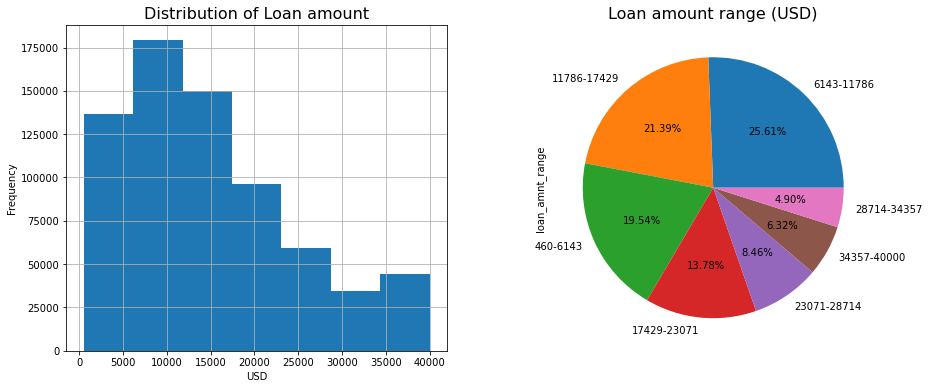

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

df['loan_amnt'].hist(bins=7,ax=axs[0])
axs[0].set_title('Distribution of Loan amount', fontsize=16)
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("USD")

df['loan_amnt_range'].value_counts().plot.pie(ax=axs[1], autopct='%.2f%%')
axs[1].set_title('Loan amount range (USD)', fontsize=16)

Text(0.5, 1.0, 'Annual income range (USD)')

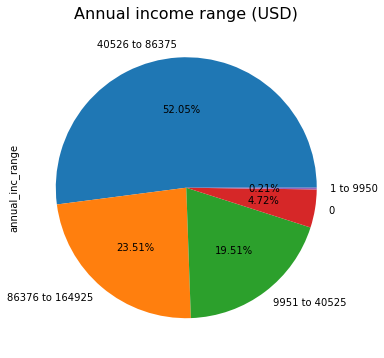

In [18]:
cat = [(df['annual_inc'] == 0),
    (df['annual_inc']>=1) & (df['annual_inc']<=9950),
    (df['annual_inc']>9950) & (df['annual_inc']<=40525),
    (df['annual_inc']>40525) & (df['annual_inc']<=86375),
    (df['annual_inc']>86375) & (df['annual_inc']<=164925)]
        
brackets = ['0','1 to 9950','9951 to 40525','40526 to 86375','86376 to 164925']
df['annual_inc_range'] = np.select(cat, brackets)

df['annual_inc_range'].value_counts().plot.pie(autopct='%.2f%%', figsize=(15, 6))
plt.title('Annual income range (USD)', fontsize=16) 

Text(0.5, 1.0, 'Interest rate range')

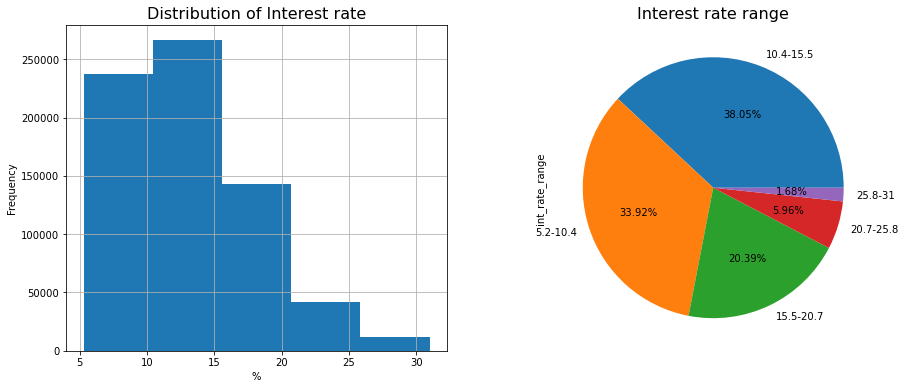

In [19]:
df['int_rate'] = df['int_rate'].str.replace('%','')
df['int_rate'] = pd.to_numeric(df['int_rate'])
df['int_rate_range'] = pd.cut(df['int_rate'], 
                                 bins=5, 
                                 labels=['5.2-10.4','10.4-15.5','15.5-20.7','20.7-25.8','25.8-31'])

fig, axs = plt.subplots(1, 2, figsize=(15, 6))


df['int_rate'].hist(bins=5, ax=axs[0])
axs[0].set_title('Distribution of Interest rate', fontsize=16)
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("%")


df['int_rate_range'].value_counts().plot.pie(ax=axs[1], autopct='%.2f%%')
axs[1].set_title('Interest rate range', fontsize=16)

Text(0.5, 1.0, 'FICO scores by range')

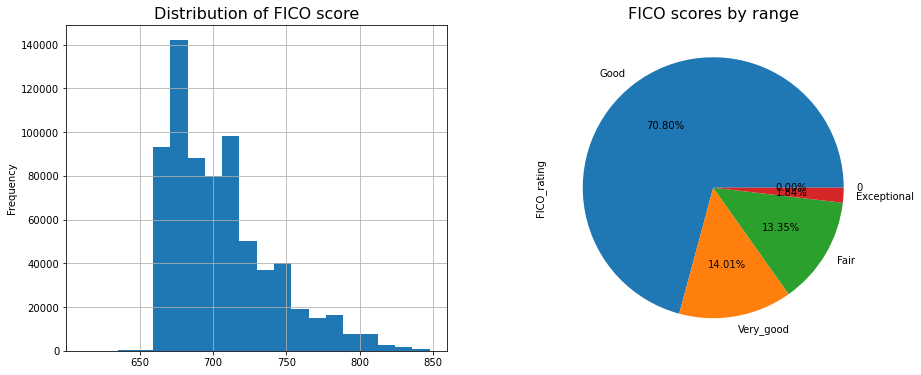

In [21]:
df['diff'] = df['fico_range_high'] - df['fico_range_low']

df['FICO_average'] = (df['fico_range_high']+df['fico_range_low'])/2

conditions = [(df['FICO_average']<580),
    (df['FICO_average']>580) & (df['FICO_average']<=669),
    (df['FICO_average']>669) & (df['FICO_average']<=739),
    (df['FICO_average']>739) & (df['FICO_average']<=799),
    (df['FICO_average']>=800)]


rating = ['Poor', 'Fair', 'Good', 'Very_good', 'Exceptional']


df['FICO_rating'] = np.select(conditions, rating)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))


df['FICO_average'].hist(bins=20, ax=axs[0], figsize=(15, 6))
axs[0].set_title('Distribution of FICO score', fontsize=16)
axs[0].set_ylabel('Frequency')


df['FICO_rating'].value_counts().plot.pie(ax=axs[1], autopct='%.2f%%')
axs[1].set_title('FICO scores by range', fontsize=16)

In [22]:
df.drop(columns=['fico_range_low','fico_range_high', 'diff'], inplace=True)

Text(0.5, 1.0, 'Revolving Trade range')

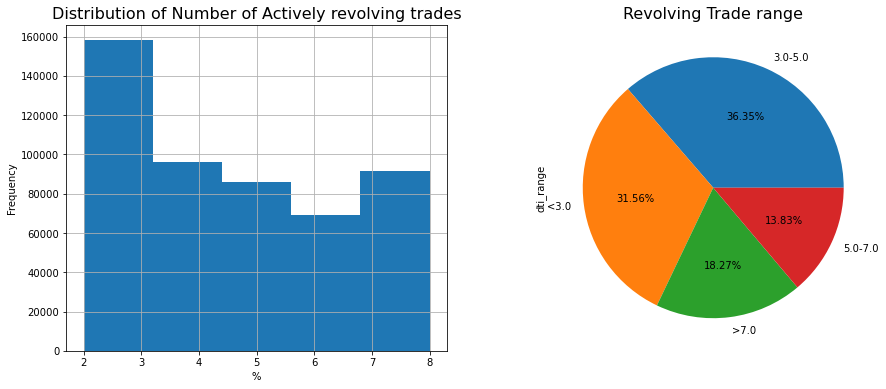

In [23]:
df['dti_range'] = pd.cut(df['dti'], 
                        bins=4, 
                        labels=['<11.0','11-17','17.0-23.00','>23.0'])
x = pd.DataFrame()
x["new_dti"] = df["num_actv_rev_tl"][df["num_actv_rev_tl"].between(df["num_actv_rev_tl"].quantile(.15), 
                                           df["num_actv_rev_tl"].quantile(.85))] # without outliers

x['dti_range'] = pd.cut(x['new_dti'], 
                        bins=4, 
                        labels=['<3.0','3.0-5.0','5.0-7.0','>7.0'])

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

x['new_dti'].hist(bins=5, ax=axs[0])
axs[0].set_title('Distribution of Number of Actively revolving trades', fontsize=16)
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("%")

x['dti_range'].value_counts().plot.pie(ax=axs[1], autopct='%.2f%%')
axs[1].set_title('Revolving Trade range', fontsize=16)

Text(0.5, 1.0, 'Loan term')

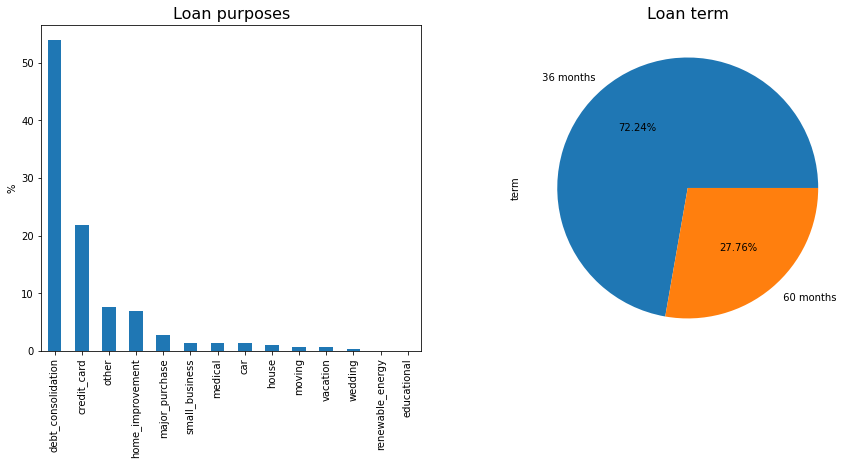

In [24]:
fig, axs = plt.subplots(1,2 , figsize=(15, 6))
df['purpose'].value_counts(normalize=True).mul(100).plot.bar(ax=axs[0])
axs[0].set_title('Loan purposes', fontsize=16)
axs[0].set_ylabel("%")

df['term'].value_counts().plot.pie(ax=axs[1], autopct='%.2f%%')
axs[1].set_title('Loan term', fontsize=16)

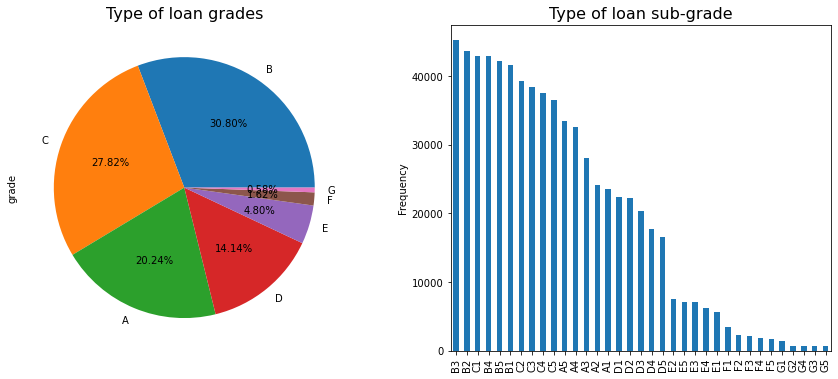

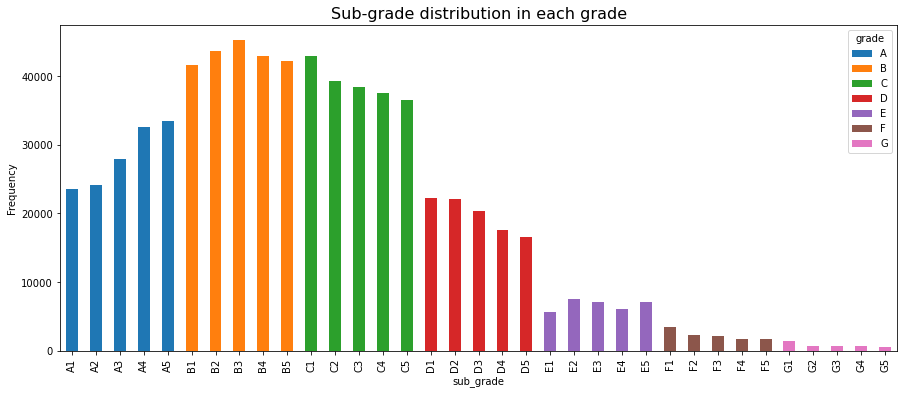

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
df['grade'].value_counts().plot.pie(ax=axs[0], autopct='%.2f%%')
axs[0].set_title('Type of loan grades', fontsize=16)

df['sub_grade'].value_counts().plot.bar(ax=axs[1])
axs[1].set_title('Type of loan sub-grade', fontsize=16)
axs[1].set_ylabel('Frequency')
plt.show()

pd.crosstab(df['sub_grade'], df['grade']).plot(kind='bar', stacked=True)
plt.title('Sub-grade distribution in each grade', fontsize=16)
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, '%')

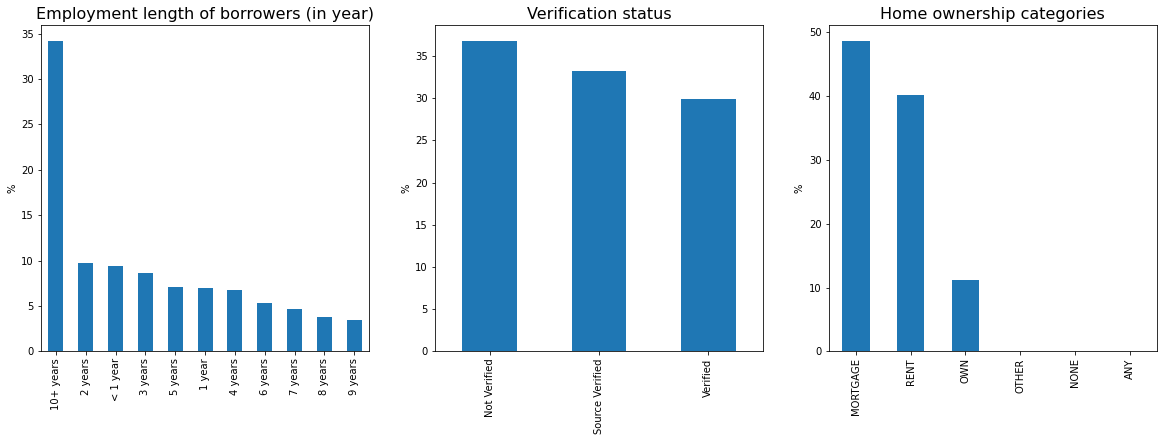

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

df['emp_length'].value_counts(normalize=True).mul(100).plot.bar(ax=axs[0])
axs[0].set_title('Employment length of borrowers (in year)', fontsize=16)
axs[0].set_ylabel("%")

df['verification_status'].value_counts(normalize=True).mul(100).plot.bar(ax=axs[1])
axs[1].set_title('Verification status', fontsize=16)
axs[1].set_ylabel("%")

df['home_ownership'].value_counts(normalize=True).mul(100).plot.bar(ax=axs[2])
axs[2].set_title('Home ownership categories', fontsize=16)
axs[2].set_ylabel("%")

In [27]:
vf = df[(df.verification_status == 'Not Verified')]

vf.head().T 

,2,6,10,15,16
id,1077175,1069639,1070078,1069759,1065775
loan_amnt,2400.0,7000.0,6500.0,1000.0,10000.0
funded_amnt,2400.0,7000.0,6500.0,1000.0,10000.0
funded_amnt_inv,2400.0,7000.0,6500.0,1000.0,10000.0
term,36 months,60 months,60 months,36 months,36 months
int_rate,15.96,15.96,14.65,16.29,15.27
installment,84.33,170.08,153.45,35.31,347.98
grade,C,C,C,D,C
sub_grade,C5,C5,C3,D1,C4
emp_title,NaN,Southern Star Photography,Southwest Rural metro,Internal revenue Service,Chin's Restaurant


Text(0.5, 1.0, 'Application type')

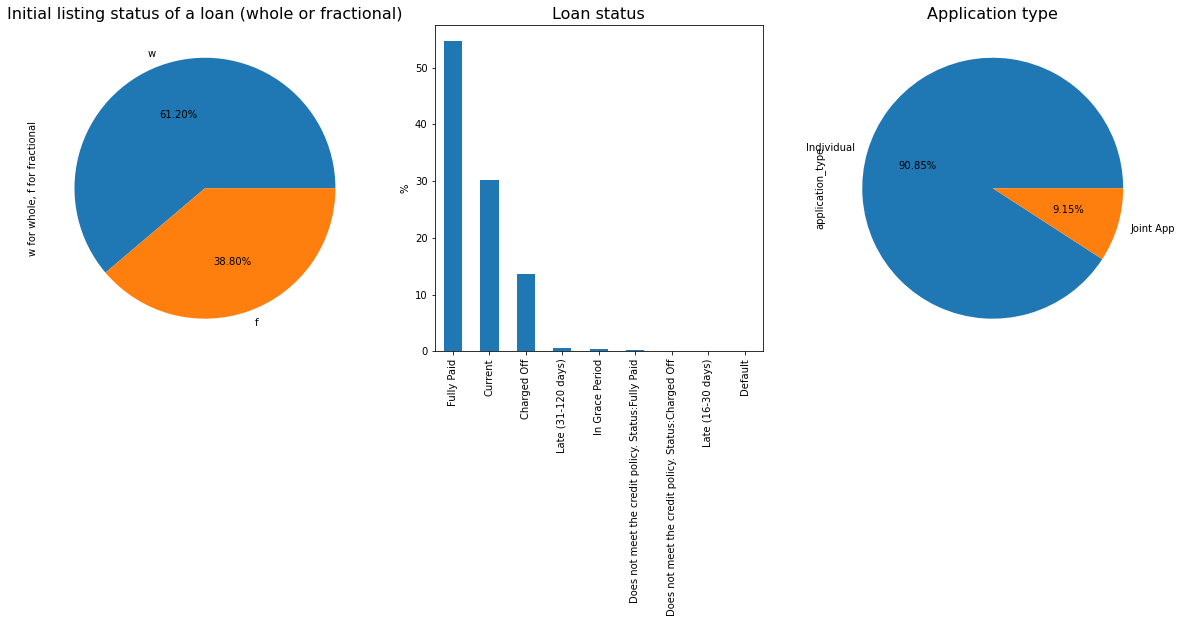

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# 1st graph
df['initial_list_status'].value_counts().plot.pie(ax=axs[0],autopct='%.2f%%')
axs[0].set_title('Initial listing status of a loan (whole or fractional)', fontsize=16)
axs[0].set_ylabel("w for whole, f for fractional")

# 2nd graphs
df['loan_status'].value_counts(normalize=True).mul(100).plot.bar(ax=axs[1])
axs[1].set_title('Loan status', fontsize=16)
axs[1].set_ylabel("%")

# 3rd graph
df['application_type'].value_counts().plot.pie(ax=axs[2],autopct='%.2f%%')
axs[2].set_title('Application type', fontsize=16)

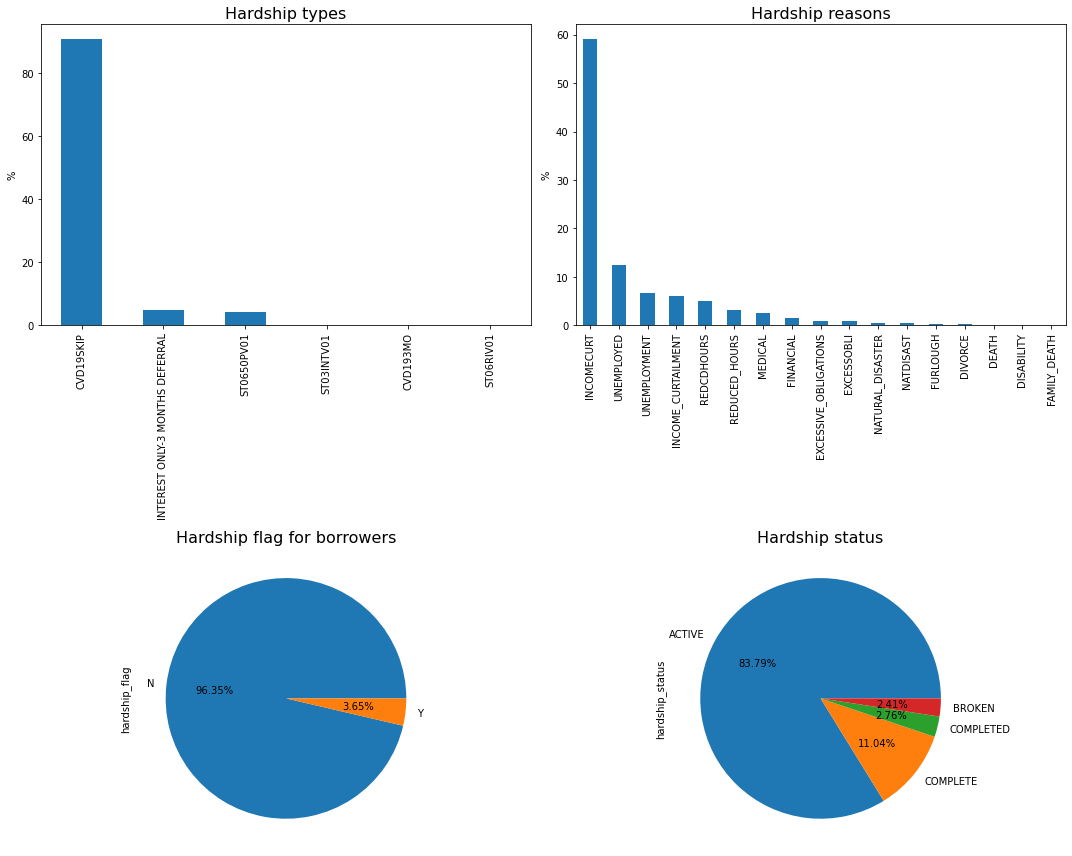

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

# 1st plot
df['hardship_type'].value_counts(normalize=True).mul(100).plot.bar(ax=axs[0,0])
axs[0,0].set_title('Hardship types', fontsize=16)
axs[0,0].set_ylabel("%")

# 2nd plot
df['hardship_reason'].value_counts(normalize=True).mul(100).plot.bar(ax=axs[0,1])
axs[0,1].set_title('Hardship reasons', fontsize=16)
axs[0,1].set_ylabel("%")

# 3rd plot
df['hardship_flag'].value_counts().plot.pie(ax=axs[1,0], autopct='%.2f%%')
axs[1,0].set_title('Hardship flag for borrowers', fontsize=16)

# 4th plot
df['hardship_status'].value_counts().plot.pie(ax=axs[1,1], autopct='%.2f%%')
axs[1,1].set_title('Hardship status', fontsize=16)
plt.tight_layout()

In [30]:
pd.crosstab(df['loan_status'], df['term'], normalize="index").mul(100)


term,36 months,60 months
loan_status,,
Charged Off,61.415946,38.584054
Current,65.651968,34.348032
Default,56.842105,43.157895
Does not meet the credit policy. Status:Charged Off,85.282523,14.717477
Does not meet the credit policy. Status:Fully Paid,89.989940,10.010060
Fully Paid,78.679403,21.320597
In Grace Period,61.435662,38.564338
Late (16-30 days),65.988372,34.011628
Late (31-120 days),59.720280,40.279720


Text(0, 0.5, '%')

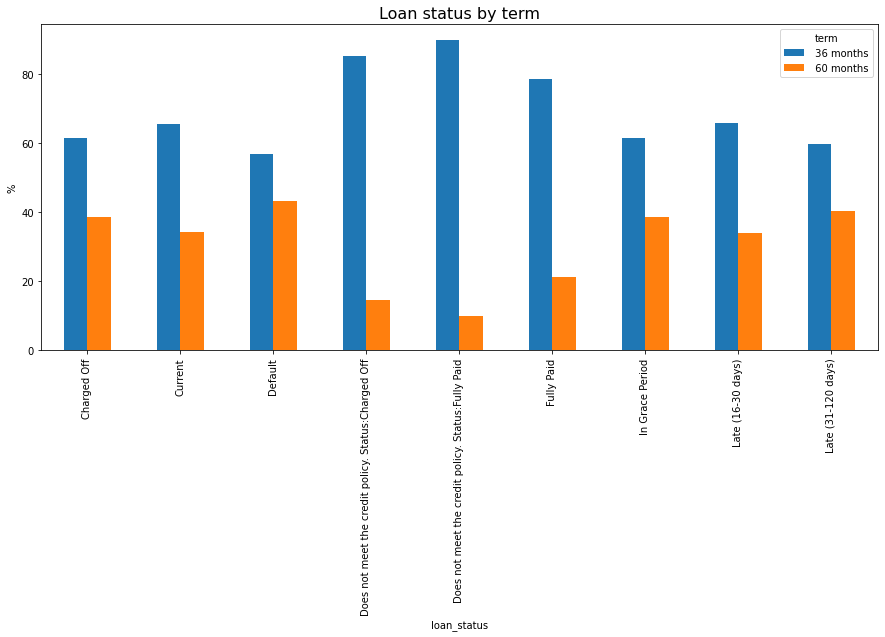

In [31]:
pd.crosstab(df['loan_status'], df['term'], normalize="index").mul(100).plot(kind='bar')
plt.title('Loan status by term', fontsize=16)
plt.ylabel('%')

Text(0, 0.5, '%')

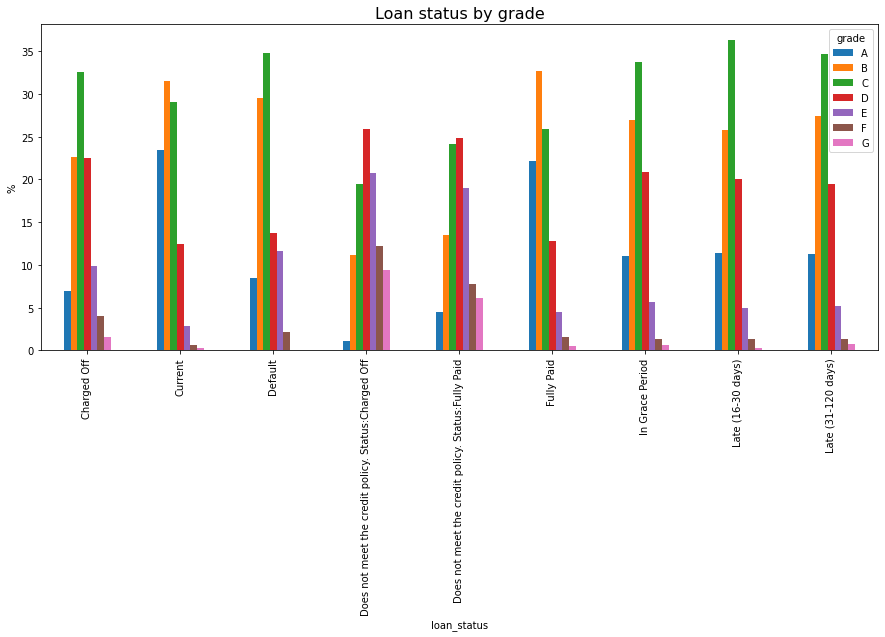

In [32]:
pd.crosstab(df['loan_status'], df['grade'], normalize='index').mul(100).plot(kind='bar', stacked=False)
plt.title('Loan status by grade', fontsize=16)
plt.ylabel('%')

In [33]:
pd.crosstab(df['loan_status'], df['home_ownership'], normalize='index').mul(100)


home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,0.004189,42.737021,0.007330,0.028273,11.094473,46.128715
Current,0.003793,47.492651,0.000000,0.000000,12.801328,39.702229
Default,0.000000,49.473684,0.000000,0.000000,14.736842,35.789474
Does not meet the credit policy. Status:Charged Off,0.000000,45.729304,0.131406,1.445466,6.438896,46.254928
Does not meet the credit policy. Status:Fully Paid,0.000000,45.674044,0.201207,1.358149,6.941650,45.824950
Fully Paid,0.003393,50.971657,0.010179,0.030536,10.154766,38.829471
In Grace Period,0.038183,46.200840,0.000000,0.000000,13.440244,40.320733
Late (16-30 days),0.000000,44.767442,0.000000,0.000000,11.337209,43.895349
Late (31-120 days),0.023310,42.027972,0.000000,0.000000,13.449883,44.498834


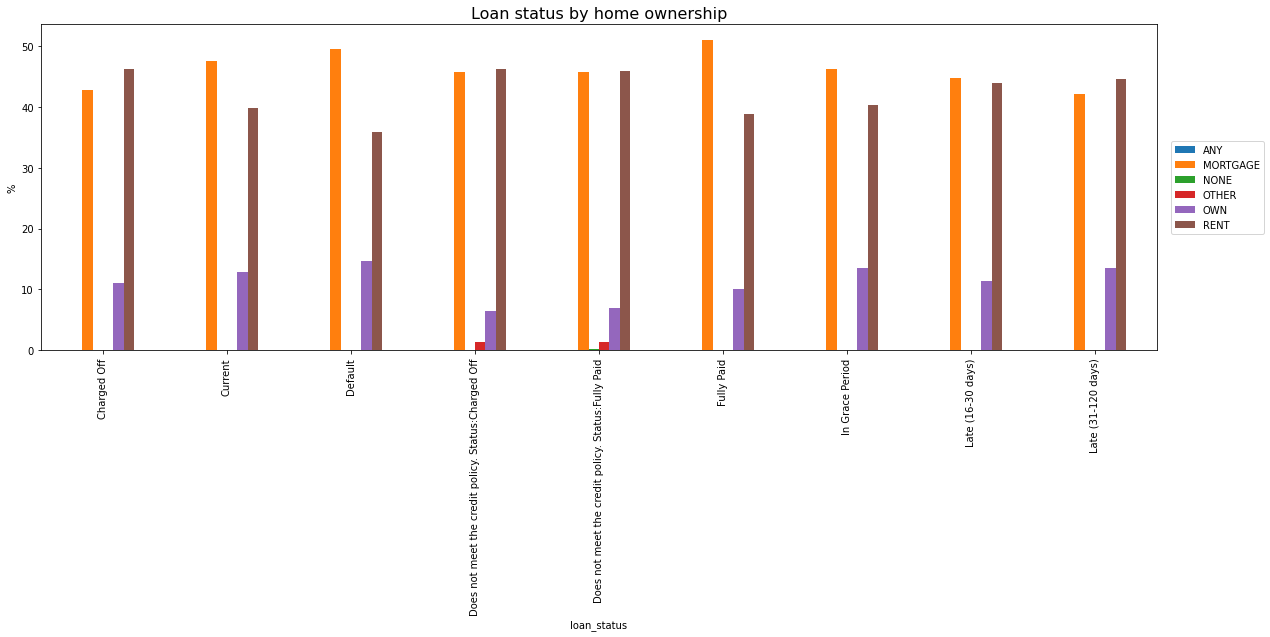

In [34]:
pd.crosstab(df['loan_status'], df['home_ownership'], normalize='index').mul(100).plot(kind='bar', figsize=(20, 6))
plt.title('Loan status by home ownership', fontsize=16)
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.1, 0.5), loc='right')

In [35]:
pd.crosstab(df['loan_status'], df['verification_status'], normalize='index').mul(100)

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,28.170223,33.967204,37.862573
Current,39.809862,37.855382,22.334756
Default,33.684211,35.789474,30.526316
Does not meet the credit policy. Status:Charged Off,67.148489,10.775296,22.076216
Does not meet the credit policy. Status:Fully Paid,66.448692,10.462777,23.088531
Fully Paid,37.223875,30.503967,32.272158
In Grace Period,31.844215,40.969836,27.185949
Late (16-30 days),30.377907,40.552326,29.069767
Late (31-120 days),32.214452,41.188811,26.596737


Text(0, 0.5, '%')

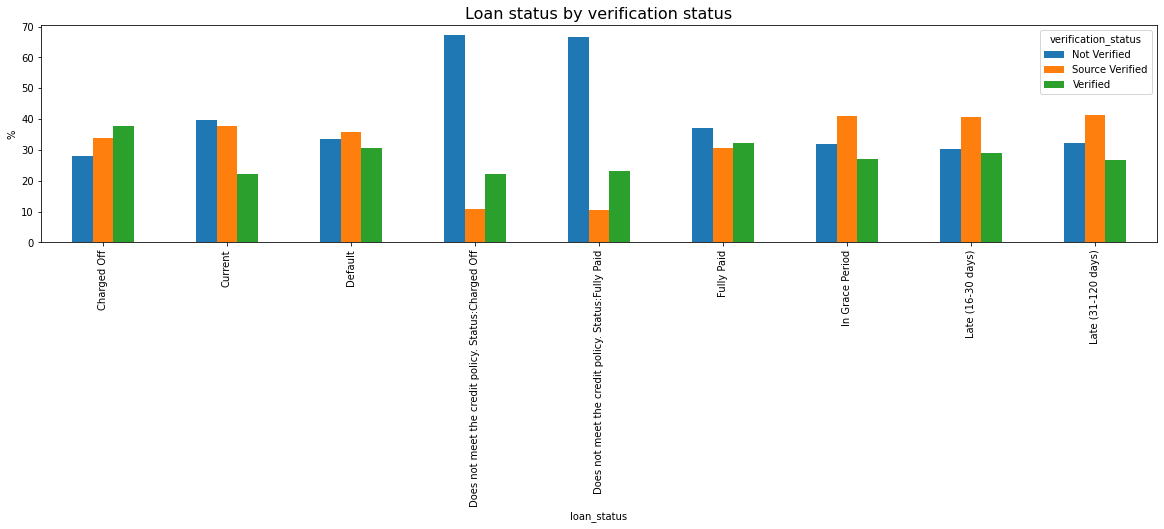

In [36]:
pd.crosstab(df['loan_status'], df['verification_status'], normalize='index').mul(100).plot(kind='bar', figsize=(20, 4))
plt.title('Loan status by verification status', fontsize=16)
plt.ylabel('%')

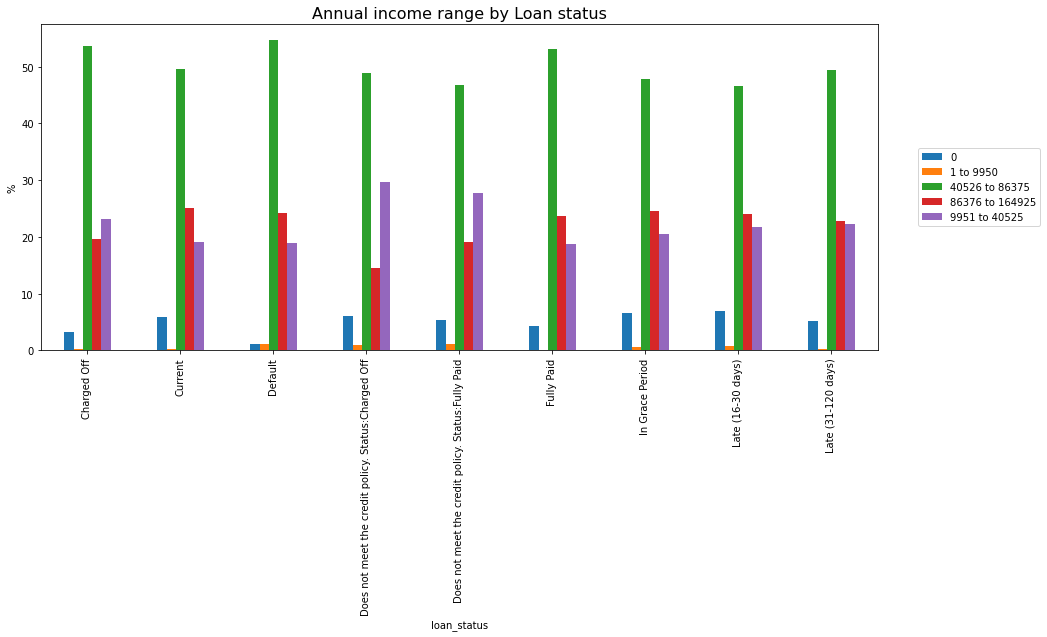

In [37]:
pd.crosstab(df['loan_status'], df['annual_inc_range'], normalize='index').mul(100).plot(kind='bar')
plt.title('Annual income range by Loan status', fontsize=16)
plt.ylabel("%")
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='right')

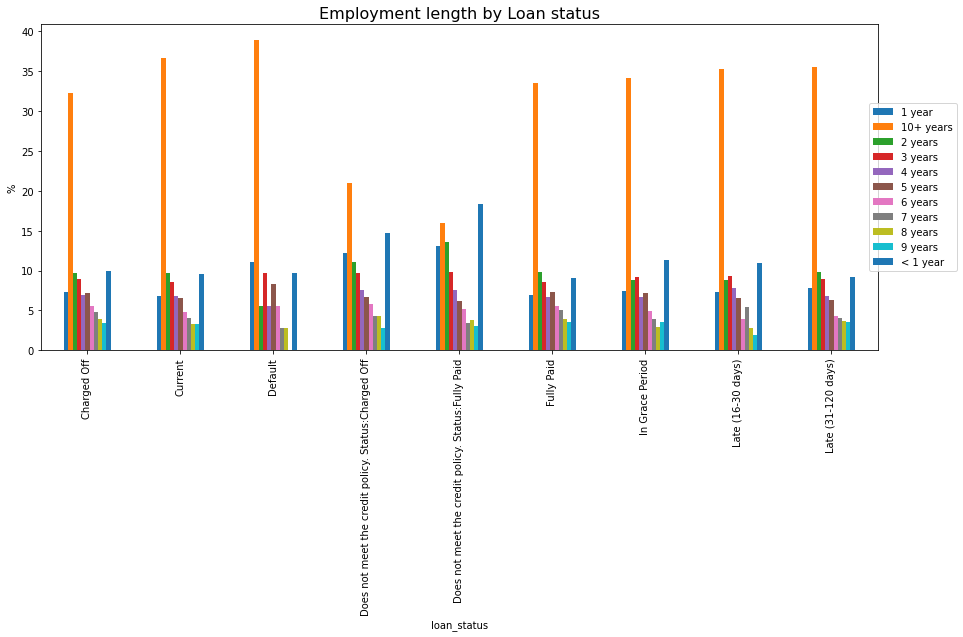

In [38]:
pd.crosstab(df['loan_status'], df['emp_length'], normalize='index').mul(100).plot(kind='bar')
plt.title('Employment length by Loan status', fontsize=16)
plt.ylabel("%")
plt.legend(bbox_to_anchor=(1.1, 0.5), loc='right')


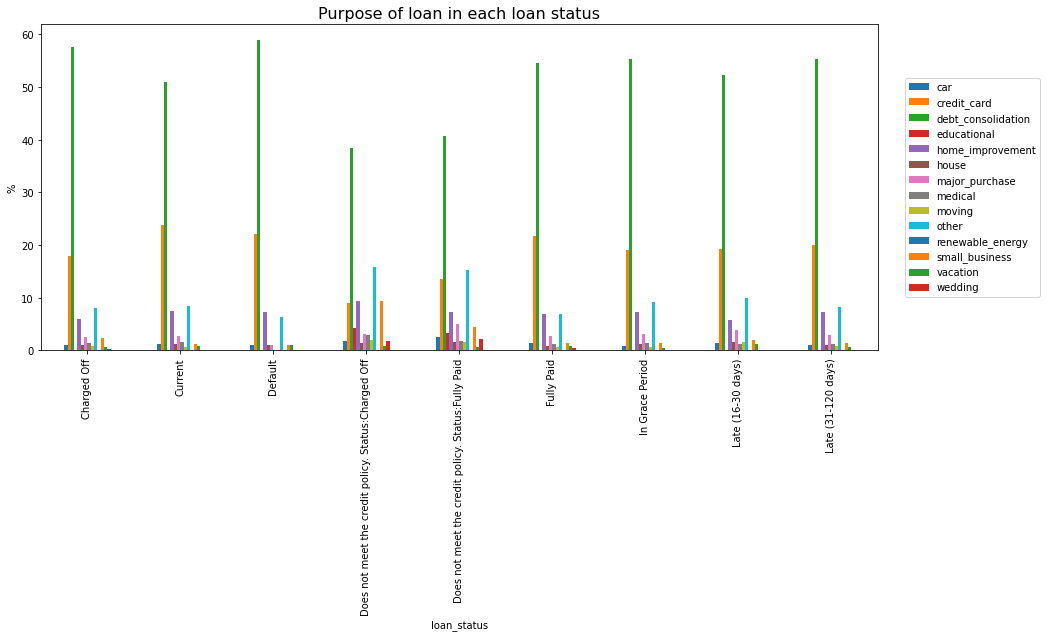

In [39]:
pd.crosstab(df['loan_status'], df['purpose'], normalize='index').mul(100).plot(kind='bar')
plt.title('Purpose of loan in each loan status', fontsize=16)
plt.ylabel("%")
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='right')

Text(0.5, 0.98, 'Distribution of Annual income range, Employment length and Purpose in Charged Off status (respectively)')

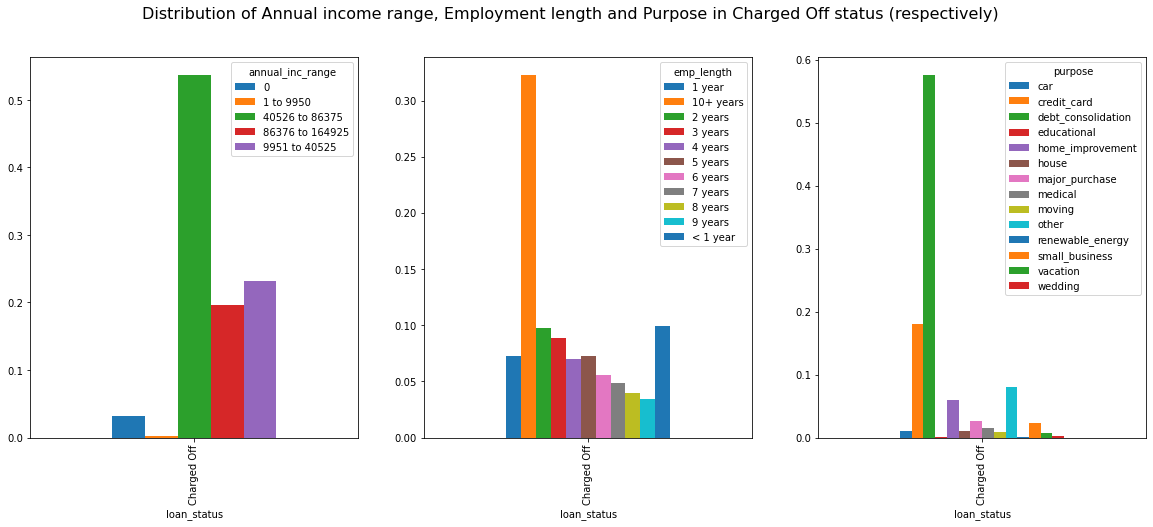

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7), sharex=True)
pd.crosstab(df['loan_status'], df['annual_inc_range'], normalize='index').filter(items=['Charged Off'], axis=0).plot(kind='bar',ax=axs[0])
pd.crosstab(df['loan_status'], df['emp_length'], normalize='index').filter(items=['Charged Off'], axis=0).plot(kind='bar',ax=axs[1])
pd.crosstab(df['loan_status'], df['purpose'], normalize='index').filter(items=['Charged Off'], axis=0).plot(kind='bar',ax=axs[2])
fig.suptitle('Distribution of Annual income range, Employment length and Purpose in Charged Off status (respectively)', fontsize=16)

In [41]:
df_1 = pd.crosstab(df['loan_status'], df['open_acc'], normalize='index').mul(100).sort_values(axis=1, by='Charged Off', ascending=False)
df_2 = pd.crosstab(df['loan_status'], df['total_acc'], normalize='index').mul(100).sort_values(axis=1, by='Charged Off', ascending=False)

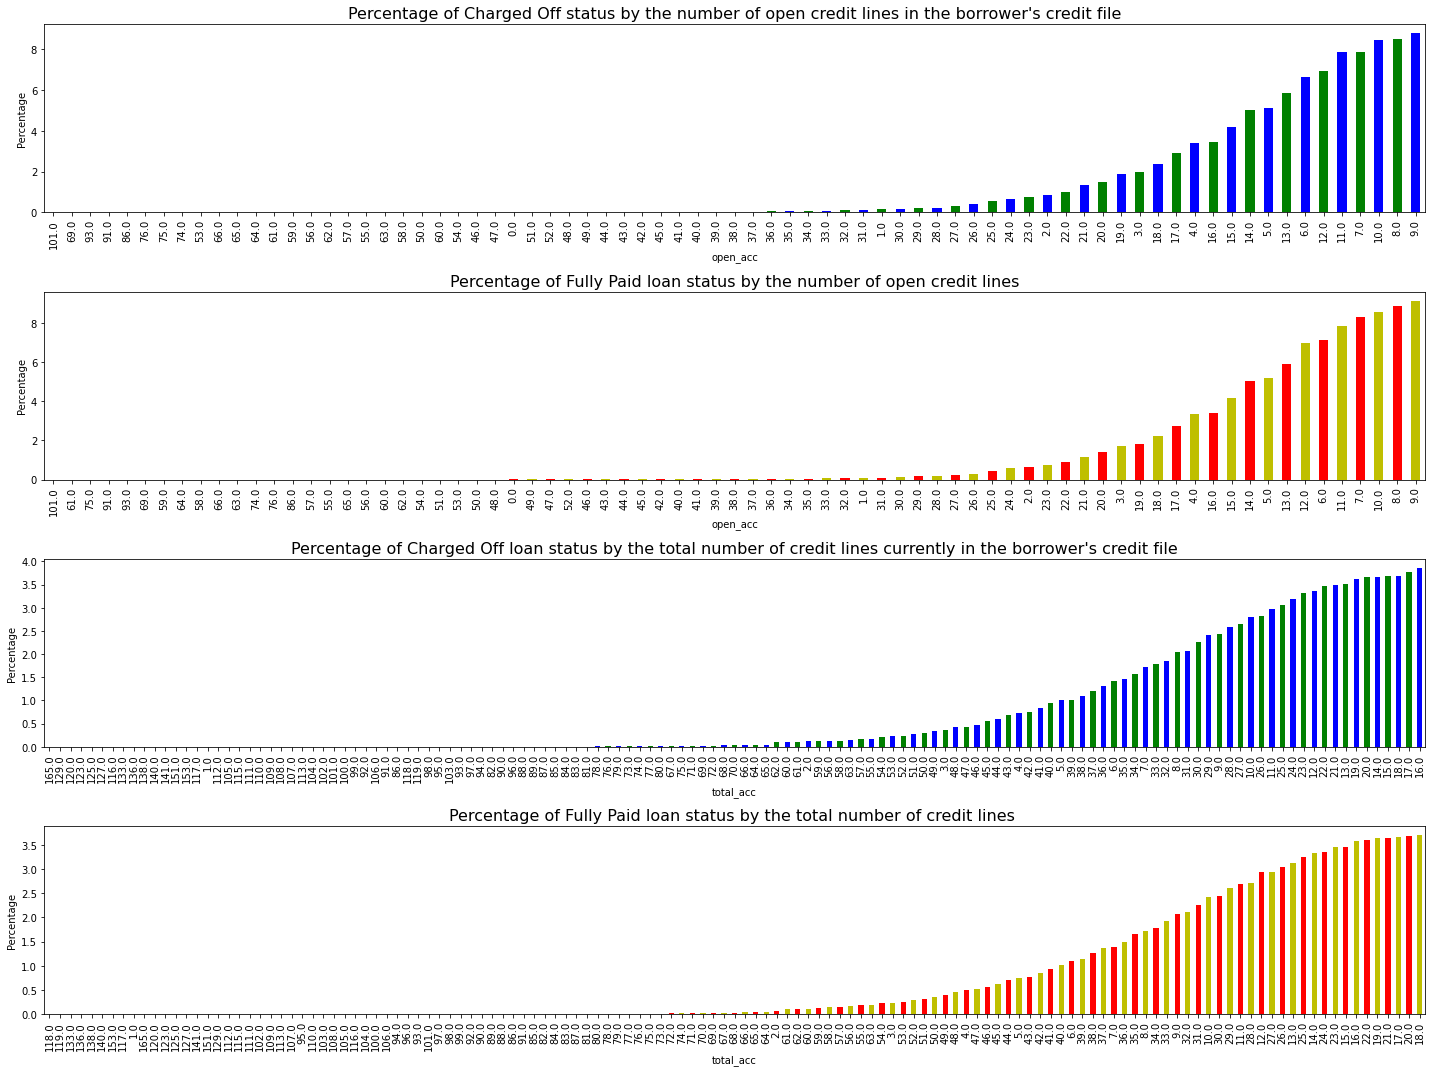

In [43]:
fig, axs = plt.subplots(4, 1, figsize=(20, 15))

df_1.sort_values(axis=1, by='Charged Off').iloc[0,:].plot.bar(ax=axs[0], color=['b', 'g'])
df_1.sort_values(axis=1, by='Fully Paid').iloc[5,:].plot.bar(ax=axs[1], color=['y', 'r'])
df_2.sort_values(axis=1, by='Charged Off').iloc[0,:].plot.bar(ax=axs[2], color=['b', 'g'])
df_2.sort_values(axis=1, by='Fully Paid').iloc[5,:].plot.bar(ax=axs[3], color=['y', 'r'])

axs[0].set_title("Percentage of Charged Off status by the number of open credit lines in the borrower's credit file", fontsize=16)
axs[1].set_title("Percentage of Fully Paid loan status by the number of open credit lines", fontsize=16)
axs[2].set_title("Percentage of Charged Off loan status by the total number of credit lines currently in the borrower's credit file", fontsize=16)
axs[3].set_title("Percentage of Fully Paid loan status by the total number of credit lines ", fontsize=16)

axs[0].set_ylabel("Percentage")
axs[1].set_ylabel("Percentage")
axs[2].set_ylabel("Percentage")
axs[3].set_ylabel("Percentage")

fig.tight_layout()

Text(0, 0.5, 'Frequency')

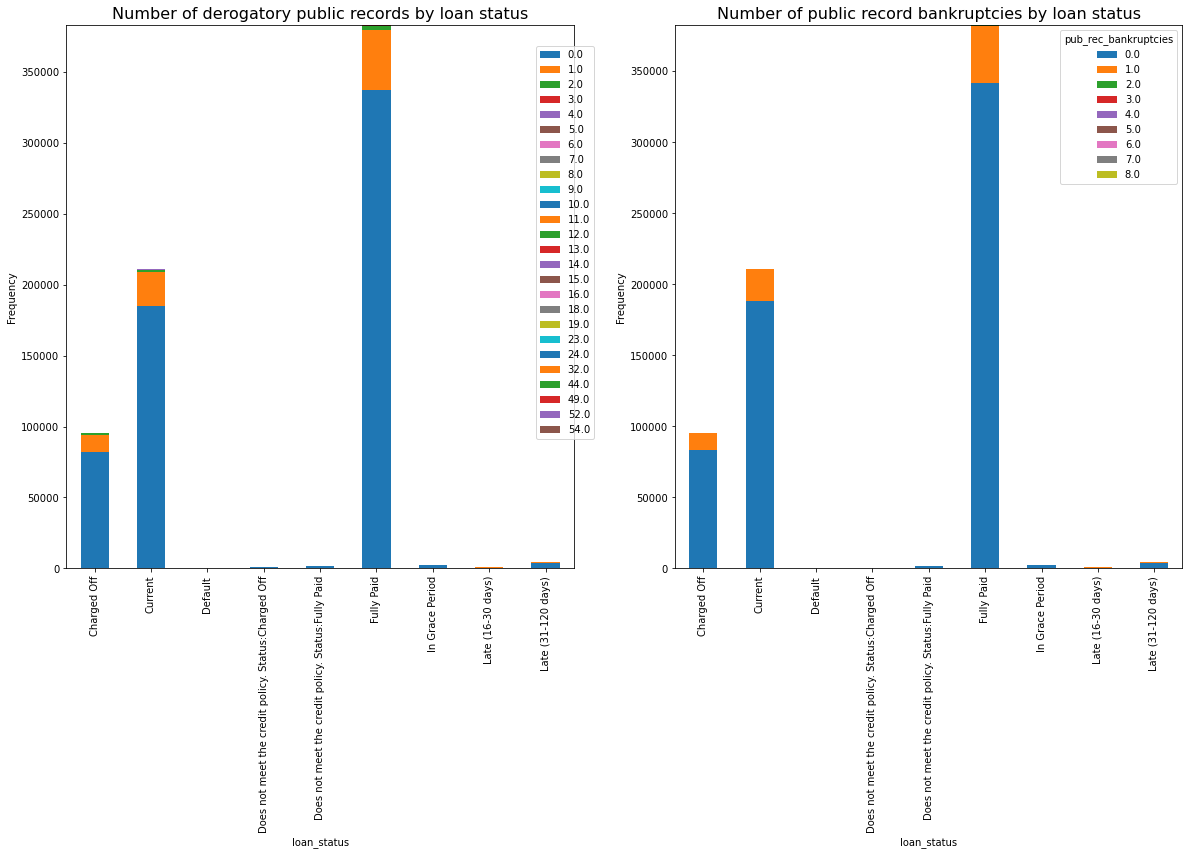

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10)) 

pd.crosstab(df['loan_status'], df['pub_rec']).plot(kind='bar',ax=axs[0], stacked=True)
axs[0].set_title('Number of derogatory public records by loan status', fontsize=16)
axs[0].set_ylabel("Frequency")
axs[0].legend(bbox_to_anchor=(1.05, 0.6), loc='right')

pd.crosstab(df['loan_status'], df['pub_rec_bankruptcies']).plot(kind='bar',ax=axs[1], stacked=True)
axs[1].set_title('Number of public record bankruptcies by loan status', fontsize=16)
axs[1].set_ylabel("Frequency")

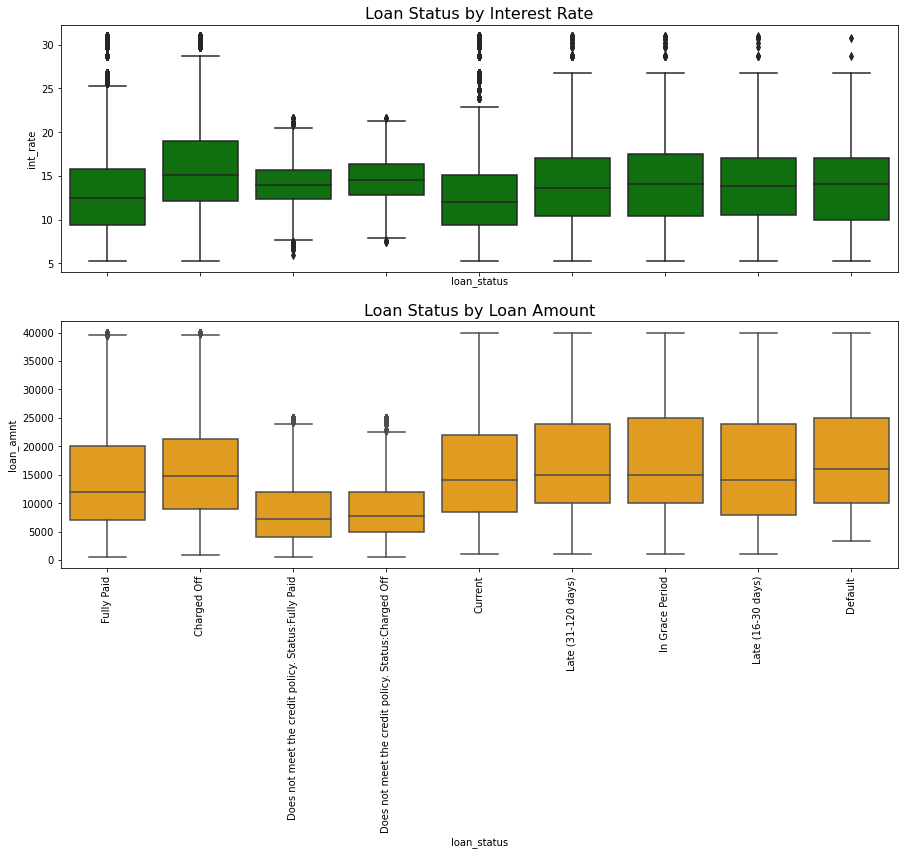

In [46]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

sns.boxplot(x="loan_status", y="int_rate", data=df, color='g', ax=axs[0])
axs[0].set_title('Loan Status by Interest Rate', fontsize=16)

sns.boxplot(x="loan_status", y="loan_amnt", data=df, color='orange', ax=axs[1])
axs[1].set_title('Loan Status by Loan Amount', fontsize=16)
axs[1].tick_params(axis='x', rotation=90)

In [47]:
df_st = pd.crosstab(df['loan_status'], df['addr_state'], normalize='index')

Text(0, 0.5, '%')

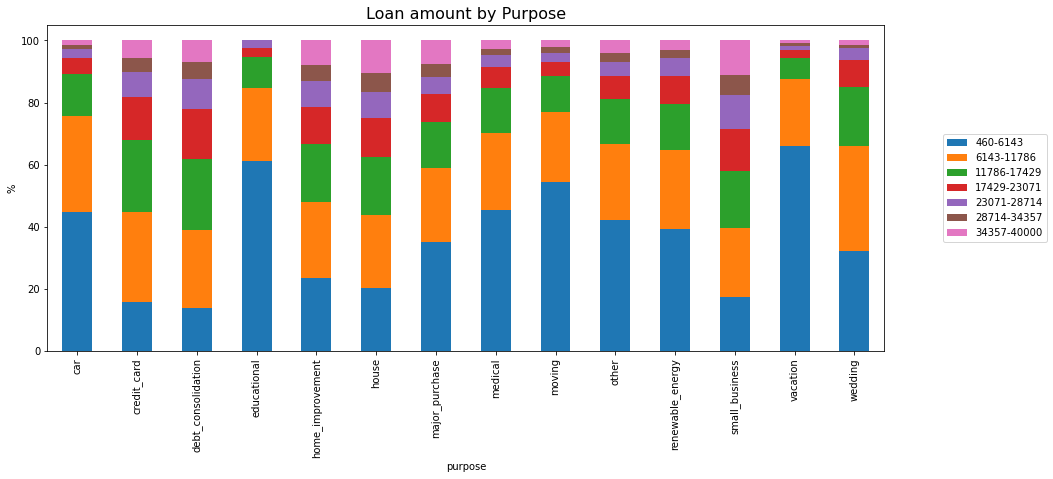

In [48]:
pd.crosstab(df['purpose'], df['loan_amnt_range'], normalize='index').mul(100).plot(kind='bar', stacked=True)
plt.title('Loan amount by Purpose', fontsize=16)
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='right')
plt.ylabel('%')

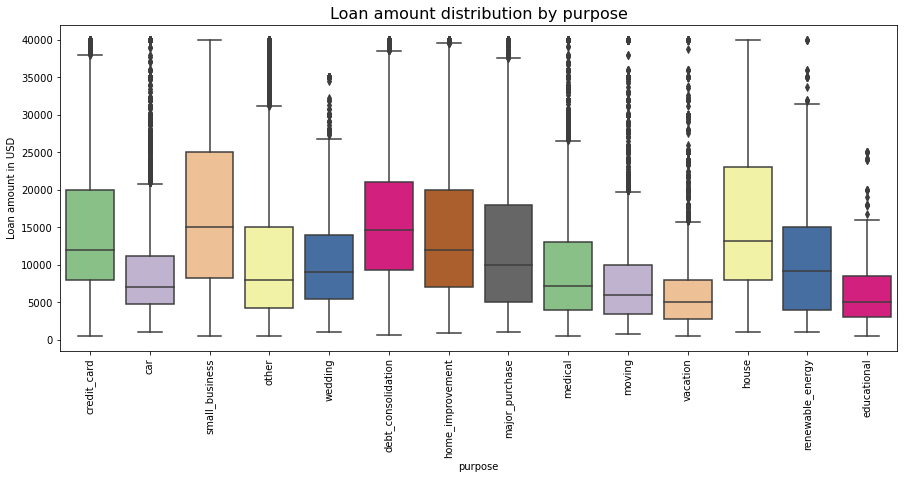

In [49]:
sns.boxplot(x='purpose', y='loan_amnt', data=df, palette="Accent")
plt.title("Loan amount distribution by purpose", fontsize=16)
plt.ylabel('Loan amount in USD')
plt.tick_params(axis='x', rotation=90)

Text(0, 0.5, '%')

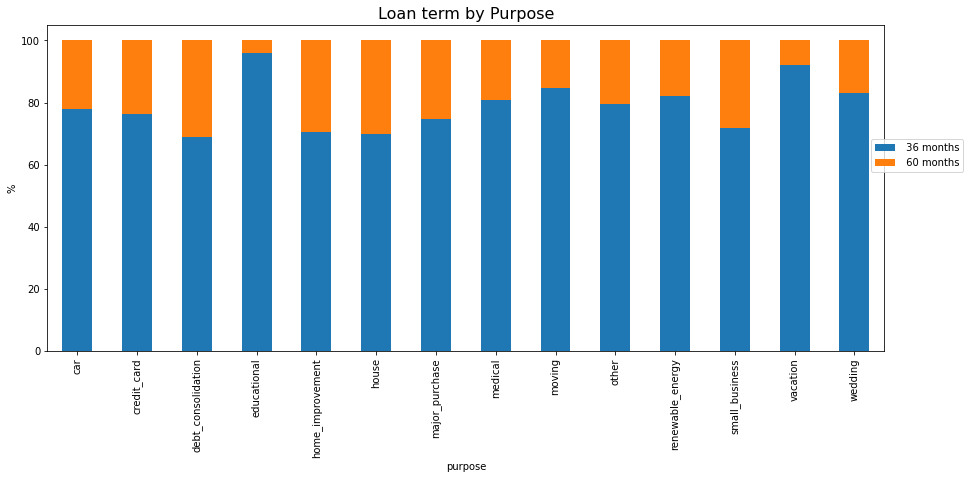

In [50]:
    pd.crosstab(df['purpose'], df['term'], normalize='index').mul(100).plot(kind='bar', stacked=True)
plt.title('Loan term by Purpose', fontsize=16)
plt.legend(bbox_to_anchor=(1.1, 0.6), loc='right')
plt.ylabel('%')

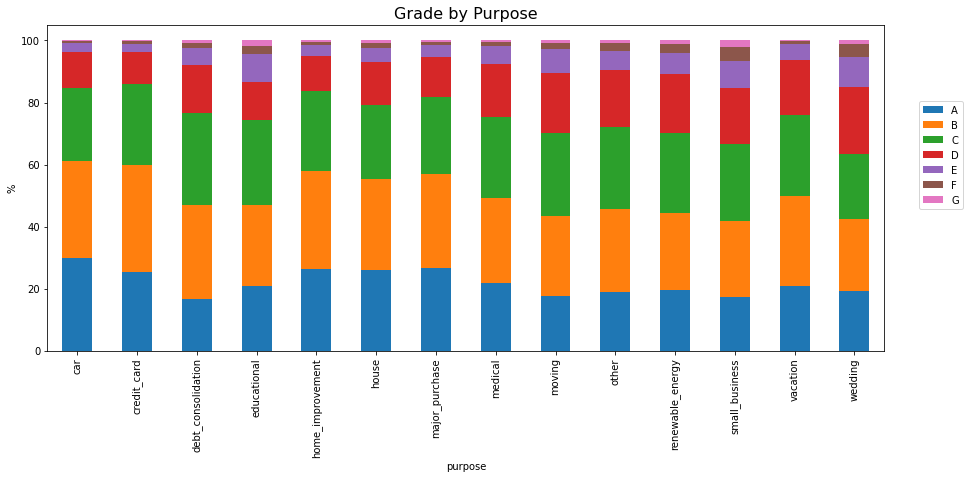

In [51]:
pd.crosstab(df['purpose'], df['grade'], normalize='index').mul(100).plot(kind='bar', stacked=True)
plt.title('Grade by Purpose', fontsize=16)
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.1, 0.6), loc='right')

Text(0, 0.5, '%')

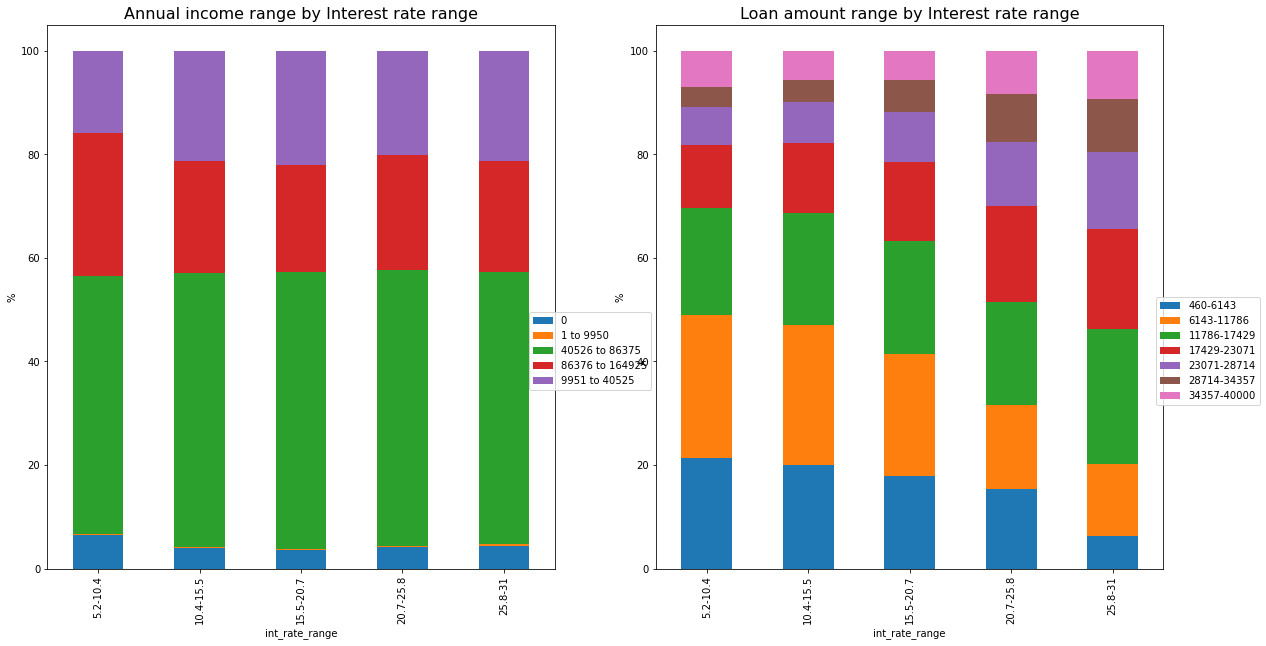

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
pd.crosstab(df['int_rate_range'], df['annual_inc_range'], normalize='index').mul(100).plot(kind='bar', ax=axs[0], stacked=True)
axs[0].set_title('Annual income range by Interest rate range', fontsize=16)
axs[0].legend(bbox_to_anchor=(1.2, 0.4), loc='right')
axs[0].set_ylabel('%')

pd.crosstab(df['int_rate_range'], df['loan_amnt_range'], normalize='index').mul(100).plot(kind='bar', ax=axs[1], stacked=True)
axs[1].set_title('Loan amount range by Interest rate range', fontsize=16)
axs[1].legend(bbox_to_anchor=(1.2, 0.4), loc='right')
axs[1].set_ylabel('%')

Text(0.5, 1.0, 'Interest rate distribution by Grade')

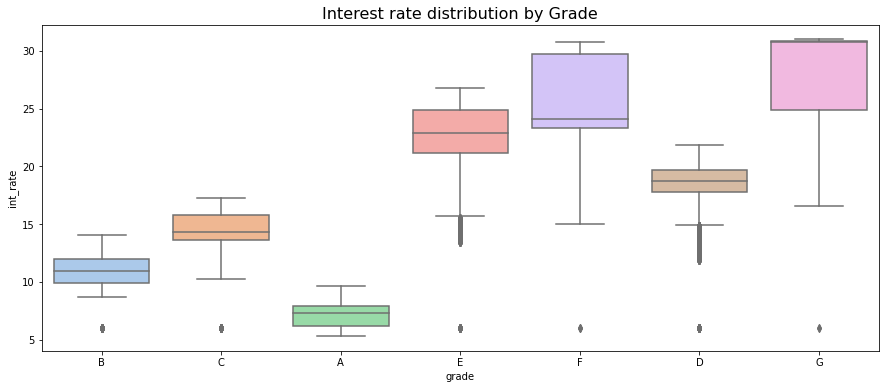

In [54]:
sns.boxplot(x='grade', y='int_rate', data=df, palette="pastel")
plt.title("Interest rate distribution by Grade", fontsize=16)